<a href="https://colab.research.google.com/github/adbioc/Specroscopy/blob/main/finalCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
from numpy import linalg as LA
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import networkx as nx
from sklearn.preprocessing import StandardScaler

In [ ]:
os.chdir("/content/drive/My Drive/Raja_CD/")
!ls *.xlsx

AMV_Data_All.xlsx  AMV_Data.xlsx


In [ ]:
df1=pd.read_excel('AMV_Data.xlsx',sheet_name="0% TFE")
df2=pd.read_excel('AMV_Data.xlsx',sheet_name="10% TFE")
df3=pd.read_excel('AMV_Data.xlsx',sheet_name="20% TFE")
df4=pd.read_excel('AMV_Data.xlsx',sheet_name="30% TFE")
df5=pd.read_excel('AMV_Data.xlsx',sheet_name="Acetonitrile")
df6=pd.read_excel('AMV_Data.xlsx',sheet_name="Methanol")



In [ ]:
def findT(df):
  T=[]
  TTCD=df
  ll=list(TTCD.columns.values)
  ll.remove(ll[0])
  return np.array(ll)

In [ ]:
def readCDT(df):
  
  T=findT(df)
  X=df.values
  lam=X[:,0]
  lam=np.delete(lam,0)
  X=np.delete(X, 0, axis=1)
  X=np.delete(X, 0, axis=0)
  r,c=X.shape
  plt.figure(figsize=(8, 7))
  for i in range(c):
      plt.plot(lam,X[:,i],label=str(T[i]))
      plt.ylabel(r'$[\theta ^o] cm^2 dmol^{-1}\cdot 10^{-3} $')
      plt.xlabel(r'$\lambda (nm)$')
      plt.title(r'$T$ Variation')
      plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
  return T+273,lam,X 


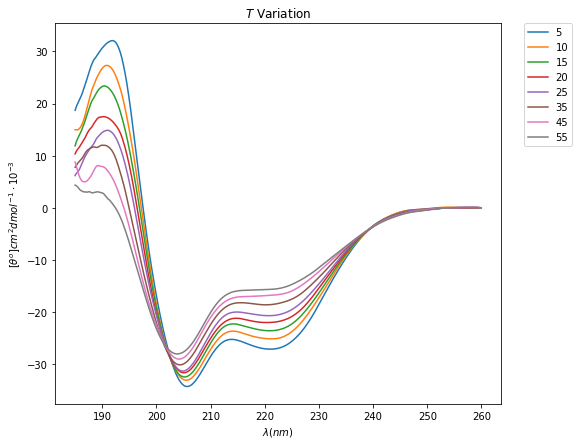

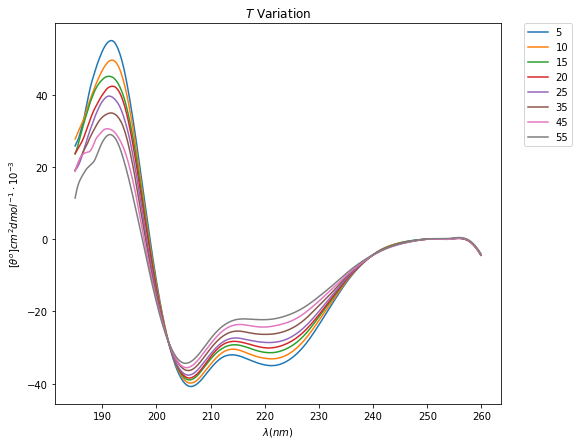

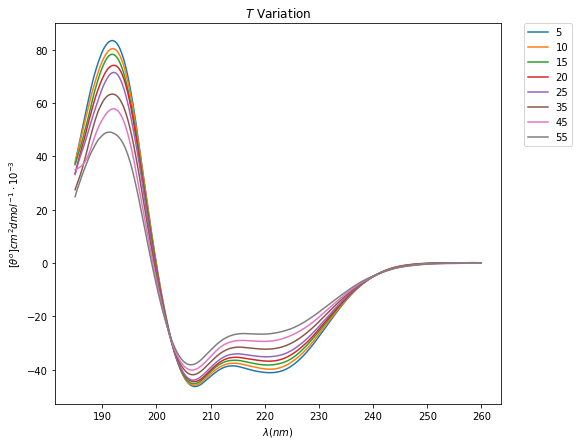

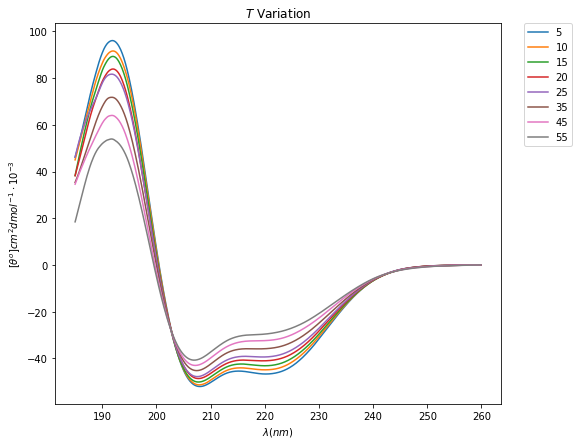

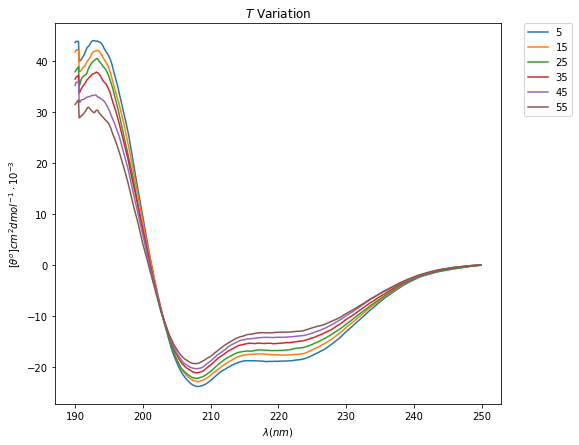

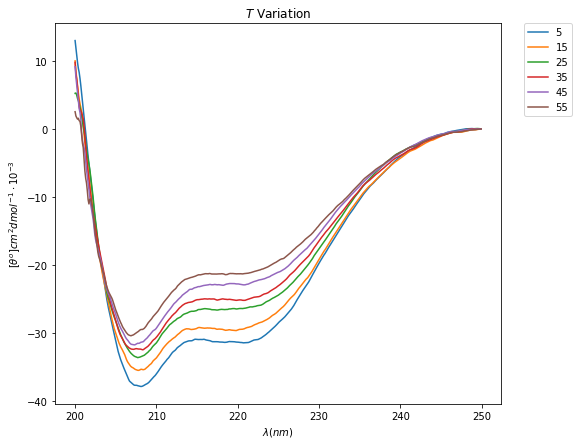

In [ ]:
T1,lam1,X1 =readCDT(df1)
T2,lam2,X2 =readCDT(df2)
T3,lam3,X3 =readCDT(df3)
T4,lam4,X4 =readCDT(df4)
T5,lam5,X5 =readCDT(df5)
T6,lam6,X6 =readCDT(df6)

In [ ]:
def ratio_plots(TT,X,lam):
  # T  and X are obtained from function readcdT
  # Given X the function plots the ratio 
  # of 222:206 and 192:206 
  l_222=np.where(lam==222)[0]
  l_206=np.where(lam==206)[0]
  l_192=np.where(lam==192)[0]
  rat1=X[l_222[0],:]/X[l_206[0],:]
  rat2=X[l_192[0],:]/X[l_206[0],:]
  fig,ax =  plt.subplots(2,2,figsize=(10,8))

  #fig, (ax1, ax2,ax3,ax4) = plt.subplots(2, 2, figsize=(6,4))
  #plt.subplots_adjust(wspace=0.3, hspace=0.2)
  # ax[0][0].set_title("222:206")
  # ax[0][1].set_title("222:206")
  # ax[1][0].set_title("Ratio(R) Plots")
  # ax[1][1].set_title("Inv R Plots")



  ax[0][0].plot(TT,rat1,'bo-')
  ax[0][1].plot(TT,rat2,'co-')
  ax[1][0].plot(rat1,rat2,'ro-')
  ax[1][1].plot(1./rat1,1/rat2,'go-')
  ax[0][0].set(xlabel='T$^o$C', ylabel='R1')
  ax[0][1].set(xlabel='T$^o$C', ylabel='R2')
  ax[1][0].set(xlabel='R1', ylabel='R2')
  ax[1][1].set(xlabel='1/R1', ylabel='1/R2')

  return rat1,rat2



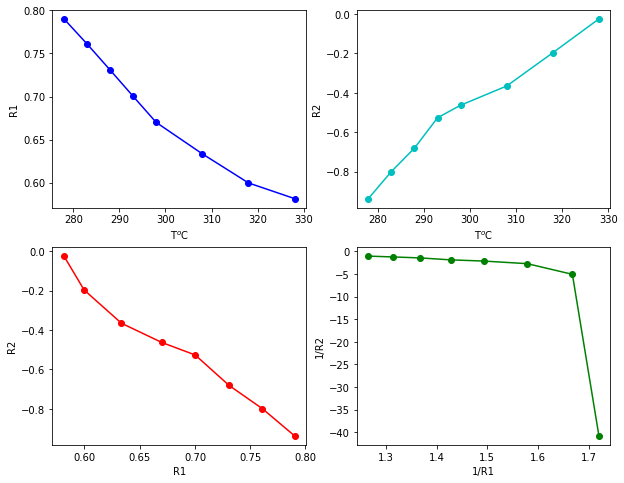

In [ ]:
[u1,v1]=ratio_plots(T1,X1,lam1)#0% TFE

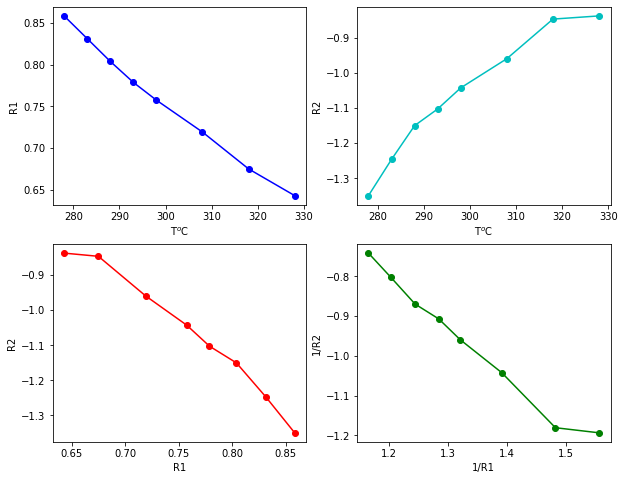

In [ ]:
[u2,v2]=ratio_plots(T2,X2,lam2)#10%TFE

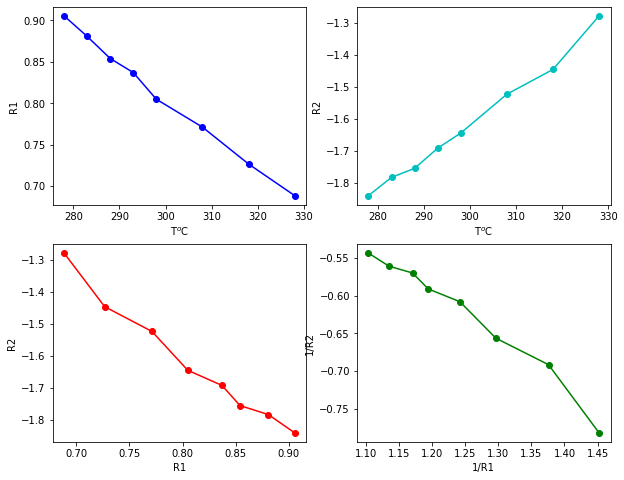

In [ ]:
[u3,v3]=ratio_plots(T3,X3,lam3)# 20%TFE

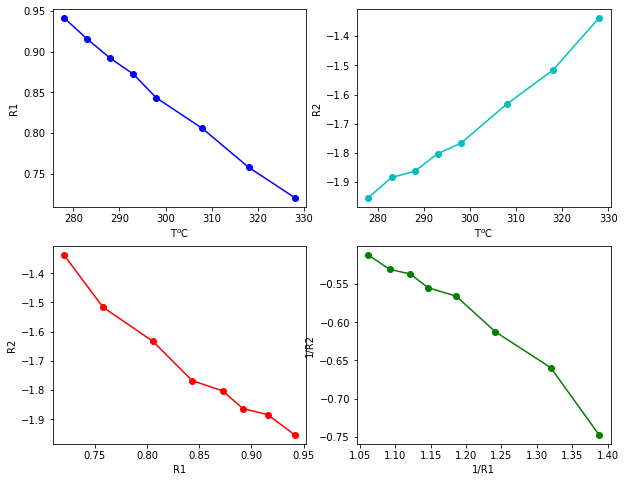

In [ ]:
[u4,v4]=ratio_plots(T4,X4,lam4)#30%TFE

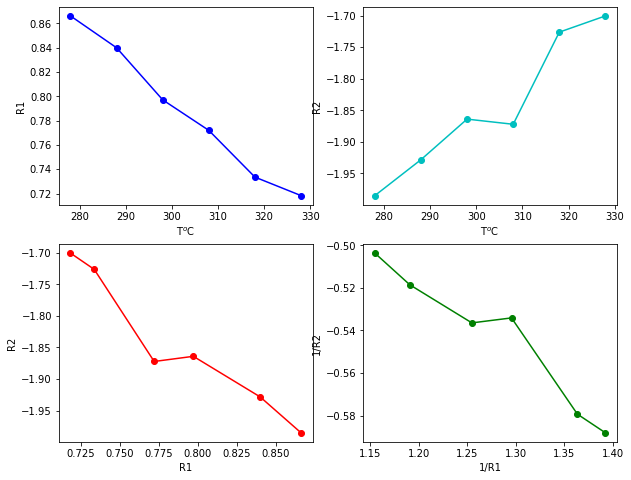

In [ ]:
[u5,v5]=ratio_plots(T5,X5,lam5)#30%TFE

In [ ]:
def eigen_reconstruct(k,X):
  from numpy import linalg as LA
  U, s, VT = LA.svd(X)
  Sigma = np.zeros((X.shape[0], X.shape[1]))
  Sigma[:min(X.shape[0], X.shape[1]), :min(X.shape[0], X.shape[1])] = np.diag(s)
  X_approx = U[:, :k] @ Sigma[:k, :k] @ VT[:k, :]
  np.shape(VT)
  print("Initial population fraction of the two Major SVD componenrs",abs(np.round(VT[0,0],4)),abs(np.round(VT[1,0],4)))
  return X_approx,s,VT

In [ ]:
X1_a,s1,VT1=eigen_reconstruct(2,X1)
X2_a,s2,VT2=eigen_reconstruct(2,X2)
X3_a,s3,VT3=eigen_reconstruct(2,X3)
X4_a,s4,VT4=eigen_reconstruct(2,X4)
X5_a,s5,VT5=eigen_reconstruct(2,X5)
X6_a,s6,VT6=eigen_reconstruct(2,X6)



Initial population fraction of the two Major SVD componenrs 0.4333 0.5219
Initial population fraction of the two Major SVD componenrs 0.4207 0.4857
Initial population fraction of the two Major SVD componenrs 0.4084 0.4069
Initial population fraction of the two Major SVD componenrs 0.4141 0.3865
Initial population fraction of the two Major SVD componenrs 0.4695 0.5053
Initial population fraction of the two Major SVD componenrs 0.4706 0.5418


In [ ]:
def epec(k,X,s,lam):
    Sigma = np.zeros((X.shape[0], X.shape[1]))
    Sigma[:min(X.shape[0], X.shape[1]), :min(X.shape[0], X.shape[1])] = np.diag(s)
    U, s, V = LA.svd(X)
    XY=U[:, :k] @ Sigma[:k, :k]
    np.shape(XY)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))
    plt.subplots_adjust(wspace=0.3, hspace=0.2)
    ax1.plot(lam,XY[:,0])
    ax1.set_title("SVD 1")
    ax2.set_title("SVD 2")
    ax2.plot(lam,XY[:,1])
    return XY

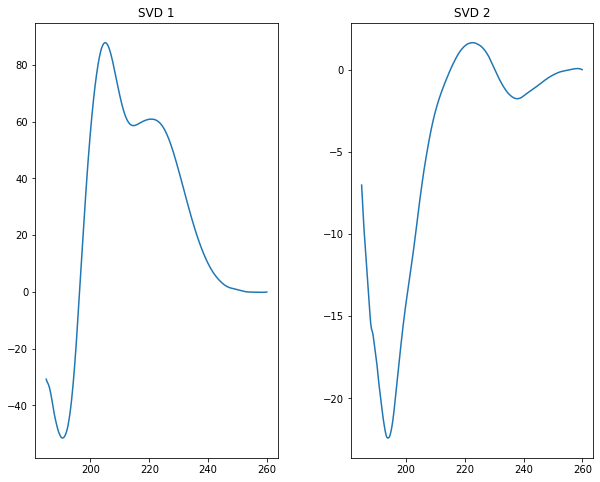

In [ ]:
XY1=epec(2,X1_a,s1,lam1)


# 0% TFE 

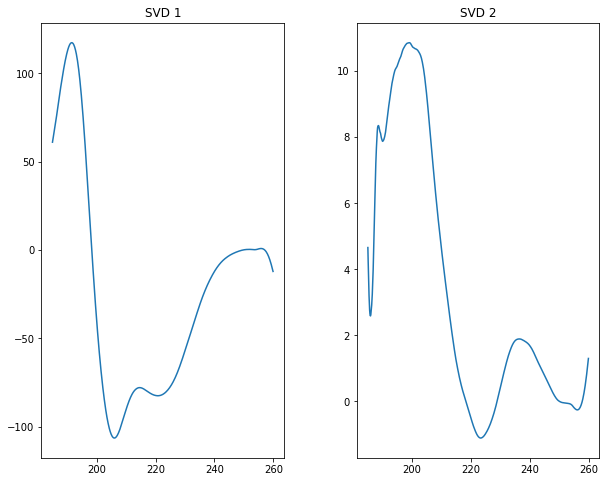

In [ ]:
XY2=epec(2,X2_a,s2,lam2)



# 10% *TFE*

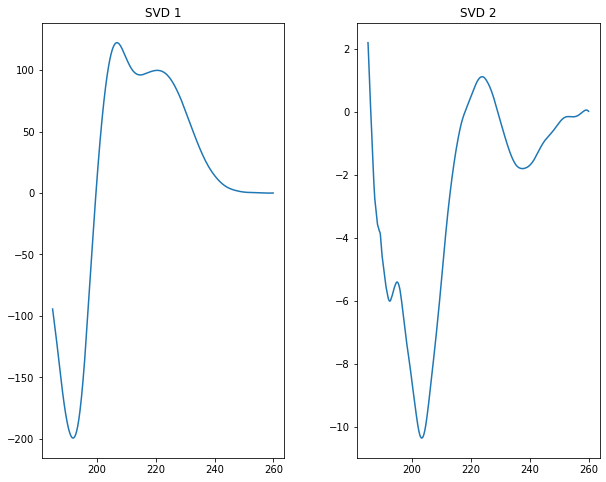

In [ ]:
XY3=epec(2,X3_a,s3,lam3)


# 20% TFE 

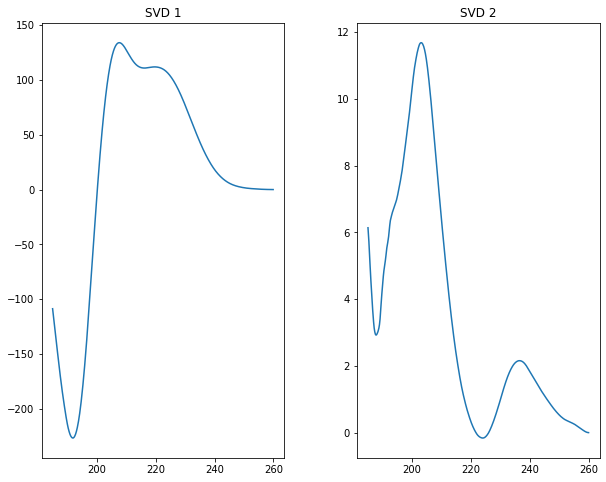

In [ ]:
XY4=epec(2,X4_a,s4,lam4)


# 30% TFE

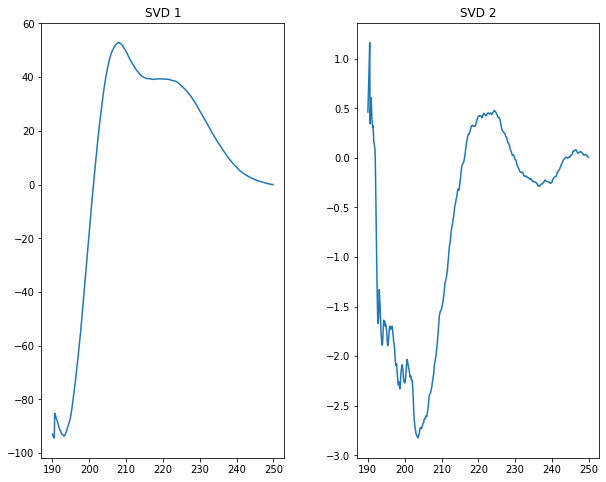

In [ ]:
XY5=epec(2,X5_a,s5,lam5)


#Acetonitrile

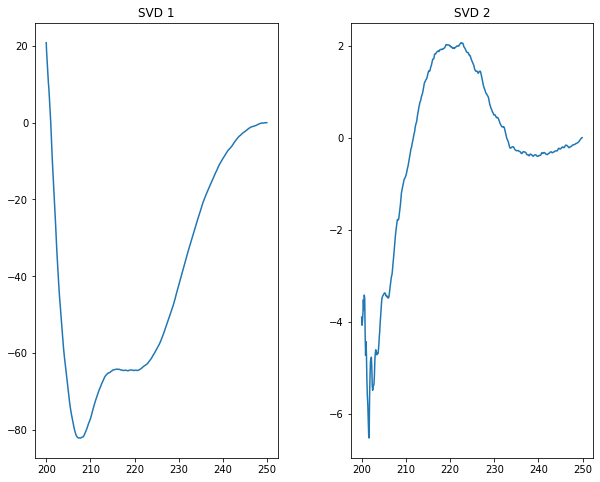

In [ ]:
XY6=epec(2,X6_a,s6,lam6)



#Methanol 

# Question 
- The singular value components vary drastically 
- What causes  the overall helicity to vary in a systematic manner?

In [ ]:
def svd2f(X,XY):
  # Two SVD components
  y1=XY[:,0]
  y2=XY[:,1]
  dy=y1-y2
  r,c=X.shape
  f=[]
  for i in range(c):
    N=np.dot(X[:,i]-y2,y1-y2)
    D=np.dot(dy,dy)
    f.append(np.sum(N)/np.sum(D))
  return f
def linfit(x, m, c):
    return m*x+c
    
from scipy.optimize import curve_fit


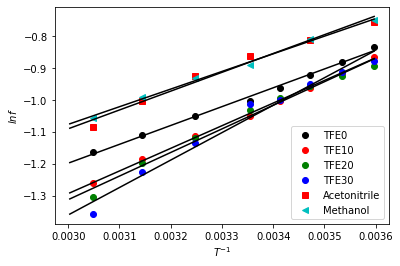

In [ ]:

F1=svd2f(X1,-XY1)
F2=svd2f(X2,XY2)
F3=svd2f(X3,-XY3)
F4=svd2f(X4,-XY4)
F5=svd2f(X5,-XY5)
F6=svd2f(X6,XY6)


u1=-R*T1*np.log(F1)
u2=-R*T2*np.log(F2)
u3=-R*T3*np.log(F3)
u4=-R*T4*np.log(F4)
u5=-R*T5*np.log(F5)
u6=-R*T6*np.log(F6)



# plt.plot(1/T1,u1,'o',label='0%TFE')
# plt.plot(1/T2,u2,'o',label='10%TFE')
# plt.plot(1/T3,u3,'o',label='20%TFE')
# plt.plot(1/T4,u4,'o',label='30%TFE')
# plt.plot(1/T5,u5,'o',label='Acetonitrile')
# plt.plot(1/T6,u6,'o',label='Methanol')

#line1, = plt.plot([3, 2, 1], marker='o', label='Line 1')

ars1, cov1 = curve_fit(f=linfit, xdata=1/T1, ydata=-u1/(R*T1), p0=[0, 0], bounds=(-np.inf, np.inf))
ars2, cov2 = curve_fit(f=linfit, xdata=1/T2, ydata=-u2/(R*T2), p0=[0, 0], bounds=(-np.inf, np.inf))
ars3, cov3 = curve_fit(f=linfit, xdata=1/T3, ydata=-u3/(R*T3), p0=[0, 0], bounds=(-np.inf, np.inf))
ars4, cov4 = curve_fit(f=linfit, xdata=1/T4, ydata=-u4/(R*T4), p0=[0, 0], bounds=(-np.inf, np.inf))
ars5, cov5 = curve_fit(f=linfit, xdata=1/T5, ydata=-u5/(R*T5), p0=[0, 0], bounds=(-np.inf, np.inf))
ars6, cov6 = curve_fit(f=linfit, xdata=1/T6, ydata=-u6/(R*T6), p0=[0, 0], bounds=(-np.inf, np.inf))

fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(1/T1,-u1/(R*T1),'ko',label='TFE0')
plt.plot(1/T2,-u2/(R*T2),'ro',label='TFE10')
plt.plot(1/T3,-u3/(R*T3),'go',label='TFE20')
plt.plot(1/T4,-u4/(R*T4),'bo',label='TFE30')
plt.plot(1/T5,-u5/(R*T5),'rs',label='Acetonitrile')
plt.plot(1/T6,-u6/(R*T6),'c<',label='Methanol')

x_dummy=np.linspace(5,60,100)
x_dummy=1/(x_dummy+273.0)
y_dummy1=ars1[0]*x_dummy +ars1[1]
y_dummy2=ars2[0]*x_dummy +ars2[1]
y_dummy3=ars3[0]*x_dummy +ars3[1]
y_dummy4=ars4[0]*x_dummy +ars4[1]
y_dummy5=ars5[0]*x_dummy +ars5[1]
y_dummy6=ars6[0]*x_dummy +ars6[1]
plt.plot(x_dummy,y_dummy1,'k-')
plt.plot(x_dummy,y_dummy2,'k-')
plt.plot(x_dummy,y_dummy3,'k-')
plt.plot(x_dummy,y_dummy4,'k-')
plt.plot(x_dummy,y_dummy5,'k-')
plt.plot(x_dummy,y_dummy6,'k-')
plt.xlabel(r'$T^{-1} $')
plt.ylabel(r'$ln f $')
plt.legend()
plt.show()


In [ ]:
# TFE const. T varrying - fractions 
onebyT=1/T1
tfe_C_f = {'1/T(K)':onebyT,'TFE0%':-R*T1*np.log(F1),'TFE10%':-R*T2*np.log(F2),'TFE20%':-R*T*np.log(F3),'TFE30%':-R*T*np.log(F4)}
tfeCf=pd.DataFrame.from_dict(tfe_C_f)
print('TABLE 1A: Fractions at different temperature')
tfeCf




TABLE 1A: Fractions at different temperature


,1/T(K),TFE0%,TFE10%,TFE20%,TFE30%
0,0.003597,461.945274,479.562274,496.311660,486.136172
1,0.003534,498.163507,516.556136,521.934498,514.571965
2,0.003472,528.948443,552.539226,549.847218,545.238936
3,0.003413,562.806698,586.536416,580.379604,584.701187
4,0.003356,595.672690,623.720062,614.277153,602.216011
5,0.003247,645.868888,684.870113,688.347532,696.878453
6,0.003145,704.865964,752.754469,759.970318,778.060231
7,0.003049,761.368778,825.496398,852.958015,888.186622


In [ ]:
onebyT5=1/T5
tfe_C_f_x = {'1/T(K)':onebyT5,'Acetonitrile':F5,'Methanol':F6}
tfeCfx=pd.DataFrame.from_dict(tfe_C_f_x)
print('TABLE 1B: Fractions at different temperature')

tfeCfx

TABLE 1B: Fractions at different temperature


,1/T(K),Acetonitrile,Methanol
0,0.003597,0.469570,0.472252
1,0.003472,0.443938,0.445812
2,0.003356,0.422871,0.410398
3,0.003247,0.396539,0.394725
4,0.003145,0.366599,0.370965
5,0.003049,0.338184,0.347472


In [ ]:
ad1={'deltaH0' :[-R*ars1[0],-R*ars2[0],-R*ars3[0],-R*ars4[0],-R*ars5[0],-R*ars6[0]]}
ad2={'deltaS0' :[R*ars1[1],R*ars2[1],R*ars3[1],R*ars4[1],R*ars5[1],R*ars6[1]]}
adic=Merge(ad1,ad2)
adff = pd.DataFrame.from_dict(adic) 
adff



,deltaH0,deltaS0
0,-1179.968711,-5.931272
1,-1416.759227,-6.832133
2,-1477.059384,-7.051091
3,-1718.467658,-7.871120
4,-1178.408056,-5.711229
5,-1104.376800,-5.461360


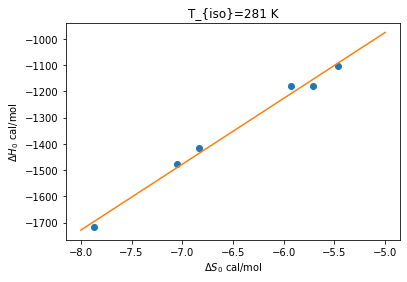

In [ ]:
mx,nx  = curve_fit(f=linfit, xdata=adff['deltaS0'], ydata=adff['deltaH0'], p0=[0, 0], bounds=(-np.inf, np.inf))

xth=np.linspace(-8,-5,100).reshape(100,1)
yth=mx[0]*xth+mx[1]
plt.plot(adff['deltaS0'],adff['deltaH0'],'o')
plt.plot(xth,yth)
plt.xlabel("$\Delta S_0$ cal/mol")
plt.ylabel("$\Delta H_0$ cal/mol")
plt.title("T_{iso}=281 K")
plt.show()


In [ ]:
mx[0]-273


-21.78896157948347

In [ ]:
mx[1]

281.0950541764985

In [ ]:
print("Isokinetic temperature =21.8 C")# mx[0]


Isokinetic temperature =21.8 C


# Inferences
- f can be approximated to fractional population of helix 
- With **increase in temperature the SVD 1 fraction (helix) decreases** 
- With increase in TFE first SVD component (helix like)  decreases
- Acetonitrile serves as a helix stabilizer,see <https://www.sciencedirect.com/science/article/abs/pii/S0141813097000652>






In [ ]:



dG=pd.read_csv('free.csv')
l=list(dG.columns.values)
T=dG[l[0]]+273.0
# dG = -RT ln K 
# ln K = -dG/RT
x=1/T
# If expressed in cal R should be 0.24*R
# R (J/K)=> 0.24*R (cal/K)

R=0.24*R
R


0.47891304679679997

# van't Hoff Approach 
    - $f = f_o.e^ \frac{-\Delta G_o}{RT}$
    - Thus if we plot log(f) against 1/T we may get an approximate value of thermodynamic parametrs 
    - See  <https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Map%3A_Physical_Chemistry_(McQuarrie_and_Simon)/26%3A_Chemical_Equilibrium/26.07%3A_The_Van't_Hoff_Equation></p>
    - The equation that follows is derivable assuming</p> $K_{eq}=f= \frac{helix}{coli}$</p>
 $\ln K = - \dfrac{\Delta_r{H^o}}{R} \dfrac{1}{T} + \dfrac{\Delta_r{S^o}}{R} $

* Plotting log(K ) against 1/T, the slope should be $-\Delta H_0/R$
    


In [ ]:
from scipy.constants import codata
F = codata.physical_constants['Faraday constant'][0]
qe = codata.physical_constants['elementary charge'][0]
R = codata.physical_constants['molar gas constant'][0]
kB = codata.physical_constants['Boltzmann constant'][0]
kB_eV = codata.physical_constants['Boltzmann constant in eV/K'][0]
N_A = codata.physical_constants['Avogadro constant'][0]
F, R, qe, kB, kB_eV, N_A

(96485.33212,
 8.314462618,
 1.602176634e-19,
 1.380649e-23,
 8.617333262e-05,
 6.02214076e+23)

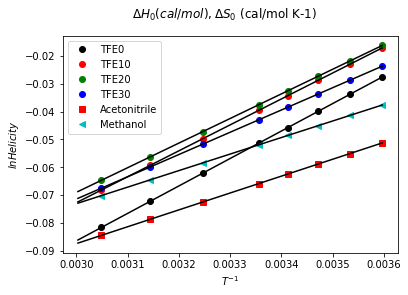

In [ ]:
# Please generate a CSV 
# We plot (- DeltaG/T)  against 1/T implies that we plot ln K against 1/T, to get a slope delta
y1=dG['TFE0']
y2=dG['TFE10']
y3=dG['TFE20']
y4=dG['TFE30']
y5=dG['Acetonitrile']
y6=dG['Methanol']
pars1, cov1 = curve_fit(f=linfit, xdata=1/T, ydata=-y1/(R*T), p0=[0, 0], bounds=(-np.inf, np.inf))
pars2, cov2 = curve_fit(f=linfit, xdata=1/T, ydata=-y2/(R*T), p0=[0, 0], bounds=(-np.inf, np.inf))
pars3, cov3 = curve_fit(f=linfit, xdata=1/T, ydata=-y3/(R*T), p0=[0, 0], bounds=(-np.inf, np.inf))
pars4, cov4 = curve_fit(f=linfit, xdata=1/T, ydata=-y4/(R*T), p0=[0, 0], bounds=(-np.inf, np.inf))
pars5, cov5 = curve_fit(f=linfit, xdata=1/T, ydata=-y5/(R*T), p0=[0, 0], bounds=(-np.inf, np.inf))
pars6, cov6 = curve_fit(f=linfit, xdata=1/T, ydata=-y6/(R*T), p0=[0, 0], bounds=(-np.inf, np.inf))

fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(x,-y1/(R*T),'ko',label='TFE0')
plt.plot(x,-y2/(R*T),'ro',label='TFE10')
plt.plot(x,-y3/(R*T),'go',label='TFE20')
plt.plot(x,-y4/(R*T),'bo',label='TFE30')
plt.plot(x,-y5/(R*T),'rs',label='Acetonitrile')
plt.plot(x,-y6/(R*T),'c<',label='Methanol')

x_dummy=np.linspace(5,60,100)
x_dummy=1/(x_dummy+273.0)
y_dummy1=pars1[0]*x_dummy +pars1[1]
y_dummy2=pars2[0]*x_dummy +pars2[1]
y_dummy3=pars3[0]*x_dummy +pars3[1]
y_dummy4=pars4[0]*x_dummy +pars4[1]
y_dummy5=pars5[0]*x_dummy +pars5[1]
y_dummy6=pars6[0]*x_dummy +pars6[1]
plt.plot(x_dummy,y_dummy1,'k-')
plt.plot(x_dummy,y_dummy2,'k-')
plt.plot(x_dummy,y_dummy3,'k-')
plt.plot(x_dummy,y_dummy4,'k-')
plt.plot(x_dummy,y_dummy5,'k-')
plt.plot(x_dummy,y_dummy6,'k-')
plt.xlabel(r'$T^{-1} $')
plt.ylabel(r'$ln Helicity $')
plt.legend()
fig.suptitle('$\Delta H_0 (cal/mol), \Delta S_0$ (cal/mol K-1)')



def Merge(dict1, dict2): 
    res = {**dict1, **dict2} 
    return res 
d1={'deltaH0' :[-R*pars1[0],-R*pars2[0],-R*pars3[0],-R*pars4[0],-R*pars5[0],-R*pars6[0]]}
d2={'deltaS0' :[R*pars1[1],R*pars2[1],R*pars3[1],R*pars4[1],R*pars5[1],R*pars6[1]]}


dic=Merge(d1,d2)

x_dummy=np.linspace(5,60,100)
x_dummy=1/(x_dummy+273.0)

yy={'1/T':x,'dG(TFE0)':-y1/(R*T),'dG(TFE10)':-y2/(R*T),'dG(TFE20)':-y3/(R*T),'dG(TFE30)':-y4/(R*T),'dG(Acetonitrile)':-y5/(R*T),'dG(Methanol)':-y6/(R*T)}
yyth={'xdummy':x_dummy,'y_dummy1':y_dummy1,'y_dummy2':y_dummy2,'y_dummy3':y_dummy3,'y_dummy4':y_dummy4,'y_dummy5':y_dummy5,'y_dummy6':y_dummy6}
# xdummy a theoretical line  from 5C  to 60 C (100 intervals),converted to K, reciprocal taken
# Slope and intercepts are delta H and delta S as expressed by dff
# y_dummy_i=  (-delta H_i/R) * xdummy + (-delta S_i/R)
yyy=pd.DataFrame.from_dict(yy)
yyyth=pd.DataFrame.from_dict(yyth)
# yyy.to_csv ('Experimental.csv', index = False, header=True)
# yyyth.to_csv ('Theoretical.csv', index = False, header=True)











In [ ]:
print("Table 2A Experimental")

yyy


Table 2A Experimental


,1/T,dG(TFE0),dG(TFE10),dG(TFE20),dG(TFE30),dG(Acetonitrile),dG(Methanol)
0,0.003597,-0.027563,-0.017093,-0.016215,-0.023665,-0.051263,-0.037626
1,0.003534,-0.033834,-0.023017,-0.021836,-0.028751,-0.055117,-0.041403
2,0.003472,-0.039886,-0.028736,-0.027262,-0.033660,-0.058837,-0.045048
3,0.003413,-0.045732,-0.034259,-0.032502,-0.038401,-0.062431,-0.048569
4,0.003356,-0.051382,-0.039597,-0.037567,-0.042983,-0.065904,-0.051971
5,0.003247,-0.062132,-0.049753,-0.047203,-0.051701,-0.072511,-0.058445
6,0.003145,-0.072205,-0.059270,-0.056233,-0.059871,-0.078703,-0.064512
7,0.003049,-0.081664,-0.068207,-0.064712,-0.067543,-0.084517,-0.070209


In [ ]:
print("Table 2B THeoretical")

yyyth


Table 2B THeoretical


,xdummy,y_dummy1,y_dummy2,y_dummy3,y_dummy4,y_dummy5,y_dummy6
0,0.003597,-0.027563,-0.017093,-0.016215,-0.023665,-0.051263,-0.037626
1,0.003590,-0.028271,-0.017762,-0.016850,-0.024239,-0.051698,-0.038053
2,0.003583,-0.028976,-0.018428,-0.017482,-0.024811,-0.052131,-0.038477
3,0.003576,-0.029678,-0.019092,-0.018111,-0.025380,-0.052563,-0.038900
4,0.003569,-0.030378,-0.019752,-0.018738,-0.025948,-0.052993,-0.039321
...,...,...,...,...,...,...,...
95,0.003023,-0.084190,-0.070593,-0.066977,-0.069592,-0.086070,-0.071730
96,0.003018,-0.084690,-0.071066,-0.067425,-0.069998,-0.086377,-0.072032
97,0.003013,-0.085189,-0.071537,-0.067872,-0.070402,-0.086683,-0.072332
98,0.003008,-0.085686,-0.072006,-0.068317,-0.070805,-0.086989,-0.072631


In [ ]:
dff = pd.DataFrame.from_dict(dic) 
dff


,deltaH0,deltaS0
0,-820.33,-3.18
1,-775.03,-2.93
2,-735.36,-2.78
3,-665.32,-2.59
4,-504.23,-2.24
5,-494.05,-2.09


# Inference 
The free energy calculation assumes that the helicity ratio is a equiibrium constant 

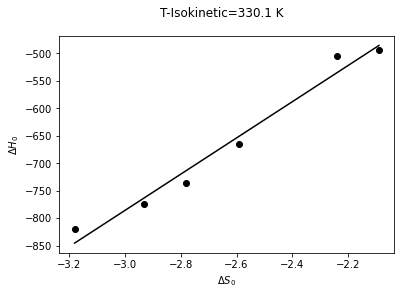

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(dff['deltaS0'],dff['deltaH0'],'ko')
pp, cc = curve_fit(f=linfit, xdata=dff['deltaS0'], ydata=dff['deltaH0'], p0=[0, 0], bounds=(-np.inf, np.inf))
plt.plot(dff['deltaS0'],dff['deltaS0']*pp[0]+pp[1],'k')
plt.xlabel(r'$\Delta S_0 $')
plt.ylabel(r'$\Delta H_0 $')
fig.suptitle("T-Isokinetic=%.1f K" % pp[0])
plt.show()

In [ ]:

pd.options.mode.chained_assignment = None  # default='warn'

def mypm2(f1,f2,f3,f4,coldel,selcol):
  lam=f1['Wavelength']
  df_col = pd.concat([f1,f2,f3,f4], axis=1)
  l=list(df_col)
  f=df_col[l[selcol]]
  f.columns=["0%TFE", "10%TFE", "20%TFE", "30%TFE"]
  f['lam']=lam
  cols = [f.columns[-1]] + [col for col in f if col != f.columns[-1]]
  f = f[cols]
  return f

def findTFE(df):
    s=[]
    ll=list(df.columns.values)
    ll.remove(ll[0])
    for i in ll:
      s.append(int(i[: -4]))
    return s


def readCDTF(df):
  lam=df.iloc[:,0]
  TFE=findTFE(df)
  X=df.values
  df.plot(x='lam')
  r,c=X.shape
  X=X[0:r,1:c]
  return lam,X,TFE 

def ratio_plots_TF(TF,X,lam):
   
  l_222=np.where(lam==222)[0]
  l_206=np.where(lam==206)[0]
  l_192=np.where(lam==192)[0]
  rat1=X[l_222[0],:]/X[l_206[0],:]
  rat2=X[l_192[0],:]/X[l_206[0],:]
  fig,ax =  plt.subplots(2,2,figsize=(10,8))
  TF=np.array(TF)
  ax[0][0].plot(TF,rat1,'bo-')
  ax[0][1].plot(TF,rat2,'co-')
  ax[1][0].plot(rat1,rat2,'ro-')
  ax[1][1].plot(1./rat1,1/rat2,'go-')
  ax[0][0].set(xlabel='TFE$\%$C', ylabel='R1')
  ax[0][1].set(xlabel='TFE$\%$C', ylabel='R2')
  ax[1][0].set(xlabel='R1', ylabel='R2')
  ax[1][1].set(xlabel='1/R1', ylabel='1/R2')
  plt.show()
  return rat1,rat2








In [ ]:
df1=pd.read_excel('AMV_Data.xlsx',sheet_name="0% TFE")
df2=pd.read_excel('AMV_Data.xlsx',sheet_name="10% TFE")
df3=pd.read_excel('AMV_Data.xlsx',sheet_name="20% TFE")
df4=pd.read_excel('AMV_Data.xlsx',sheet_name="30% TFE")

selcol='Wavelength'
dff1=mypm2(df1,df2,df3,df4,selcol,1)
dff2=mypm2(df1,df2,df3,df4,selcol,2)
dff3=mypm2(df1,df2,df3,df4,selcol,3)
dff4=mypm2(df1,df2,df3,df4,selcol,4)
dff5=mypm2(df1,df2,df3,df4,selcol,5)
dff6=mypm2(df1,df2,df3,df4,selcol,6)
dff7=mypm2(df1,df2,df3,df4,selcol,7)
dff8=mypm2(df1,df2,df3,df4,selcol,8)



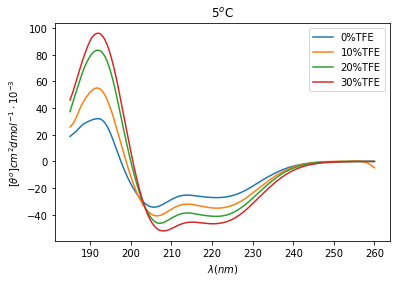

In [ ]:
lam1,X1,tfe=readCDTF(dff1)
plt.ylabel(r'$[\theta ^o] cm^2 dmol^{-1}\cdot 10^{-3} $')
plt.xlabel(r'$\lambda (nm)$')
plt.title('5$^o$C')
plt.show()

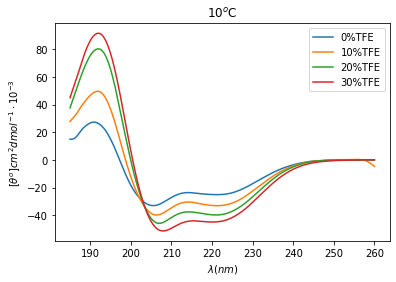

In [ ]:
lam2,X2,tfe=readCDTF(dff2)
plt.ylabel(r'$[\theta ^o] cm^2 dmol^{-1}\cdot 10^{-3} $')
plt.xlabel(r'$\lambda (nm)$')
plt.title('10$^o$C')
plt.show()

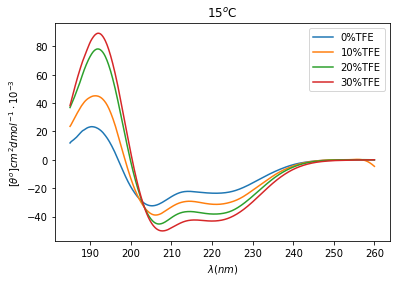

In [ ]:
lam3,X3,tf=readCDTF(dff3)
plt.ylabel(r'$[\theta ^o] cm^2 dmol^{-1}\cdot 10^{-3} $')
plt.xlabel(r'$\lambda (nm)$')
plt.title('15$^o$C')
plt.show()


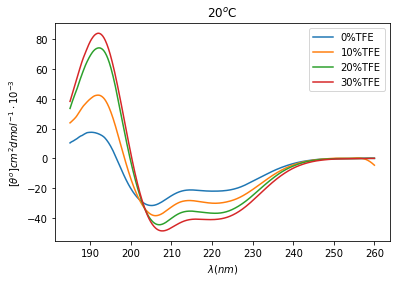

In [ ]:
lam4,X4,tfe=readCDTF(dff4)
plt.ylabel(r'$[\theta ^o] cm^2 dmol^{-1}\cdot 10^{-3} $')
plt.xlabel(r'$\lambda (nm)$')
plt.title('20$^o$C')
plt.show()

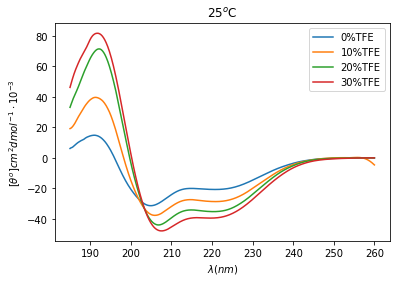

In [ ]:
lam5,X5,tfe=readCDTF(dff5)
plt.ylabel(r'$[\theta ^o] cm^2 dmol^{-1}\cdot 10^{-3} $')
plt.xlabel(r'$\lambda (nm)$')
plt.title('25$^o$C')
plt.show()

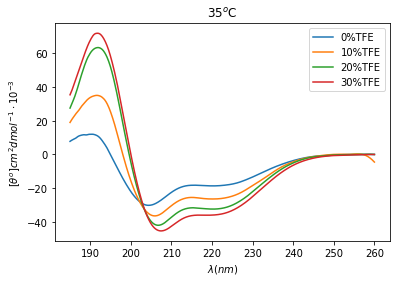

In [ ]:
lam6,X6,tfe=readCDTF(dff6)
plt.ylabel(r'$[\theta ^o] cm^2 dmol^{-1}\cdot 10^{-3} $')
plt.xlabel(r'$\lambda (nm)$')
plt.title('35$^o$C')
plt.show()

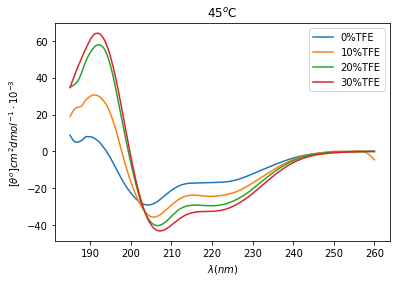

In [ ]:
lam7,X7,tfe=readCDTF(dff7)
plt.ylabel(r'$[\theta ^o] cm^2 dmol^{-1}\cdot 10^{-3} $')
plt.xlabel(r'$\lambda (nm)$')
plt.title('45$^o$C')
plt.show()

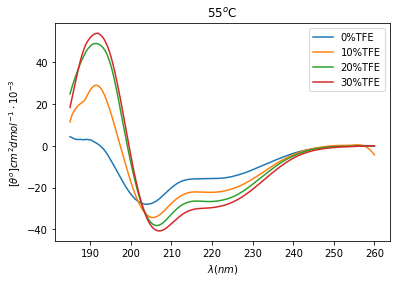

In [ ]:
lam8,X8,tfe=readCDTF(dff8)
plt.ylabel(r'$[\theta ^o] cm^2 dmol^{-1}\cdot 10^{-3} $')
plt.xlabel(r'$\lambda (nm)$')
plt.title('55$^o$C')
plt.show()

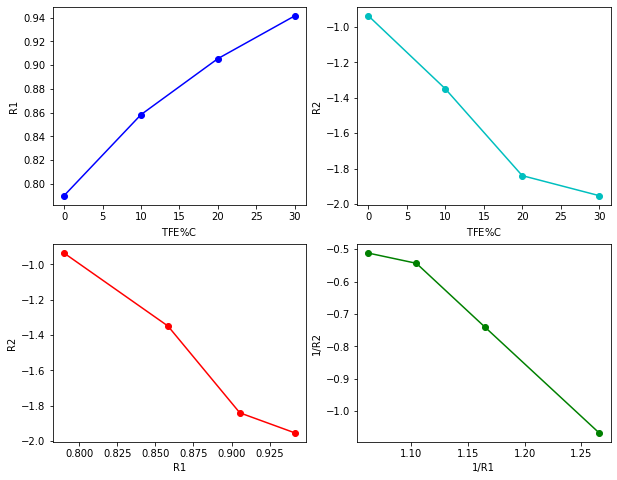

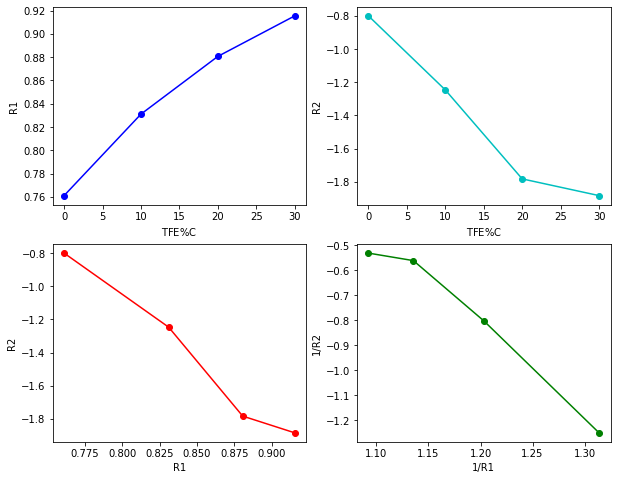

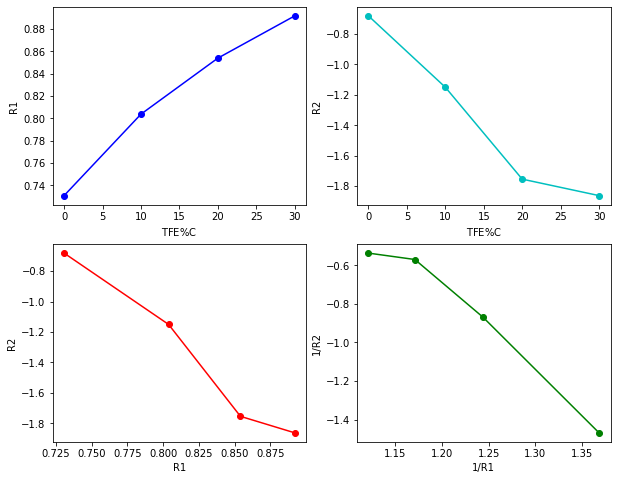

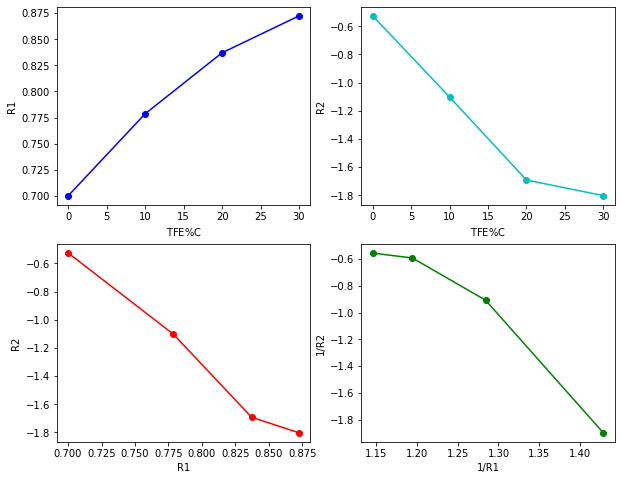

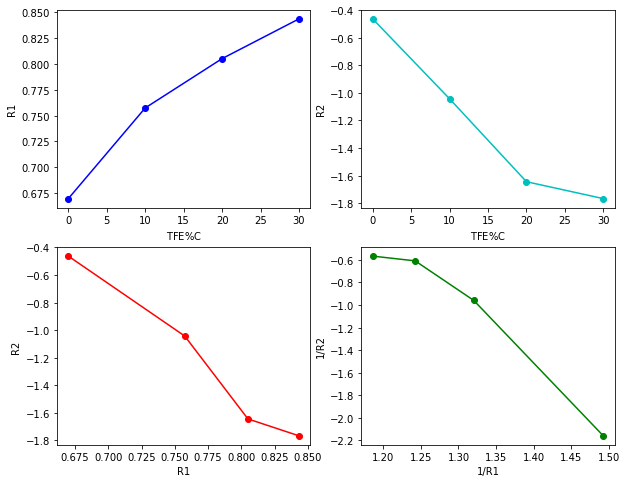

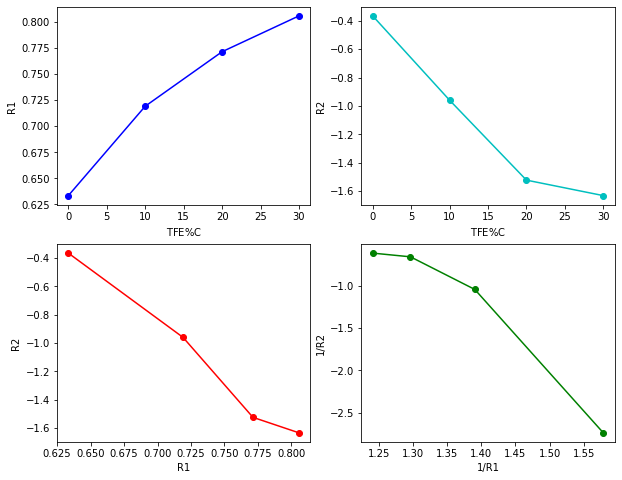

(array([0.63346687, 0.71906515, 0.77124104, 0.80555316]),
 array([-0.36531415, -0.95958803, -1.52338485, -1.6325375 ]))

In [ ]:
ratio_plots_TF(tfe,X1,lam1)
ratio_plots_TF(tfe,X2,lam2)
ratio_plots_TF(tfe,X3,lam3)
ratio_plots_TF(tfe,X4,lam4)
ratio_plots_TF(tfe,X5,lam5)
ratio_plots_TF(tfe,X6,lam6)




In [ ]:
X1_a,s1,VT1=eigen_reconstruct(2,X1)
X2_a,s2,VT2=eigen_reconstruct(2,X2)
X3_a,s3,VT3=eigen_reconstruct(2,X3)
X4_a,s4,VT4=eigen_reconstruct(2,X4)
X5_a,s5,VT5=eigen_reconstruct(2,X5)
X6_a,s6,VT6=eigen_reconstruct(2,X6)
X7_a,s7,VT7=eigen_reconstruct(2,X7)
X8_a,s8,VT8=eigen_reconstruct(2,X8)




Initial population fraction of the two Major SVD componenrs 0.293 0.7526
Initial population fraction of the two Major SVD componenrs 0.2739 0.7744
Initial population fraction of the two Major SVD componenrs 0.2636 0.7843
Initial population fraction of the two Major SVD componenrs 0.2503 0.8036
Initial population fraction of the two Major SVD componenrs 0.2363 0.7955
Initial population fraction of the two Major SVD componenrs 0.2393 0.822
Initial population fraction of the two Major SVD componenrs 0.2311 0.8315
Initial population fraction of the two Major SVD componenrs 0.2363 0.8505


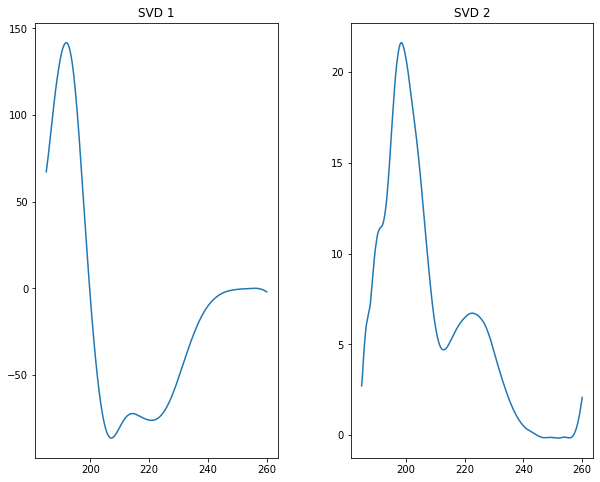

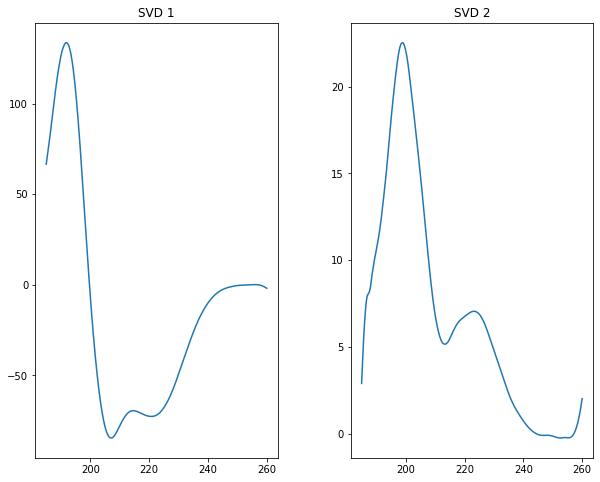

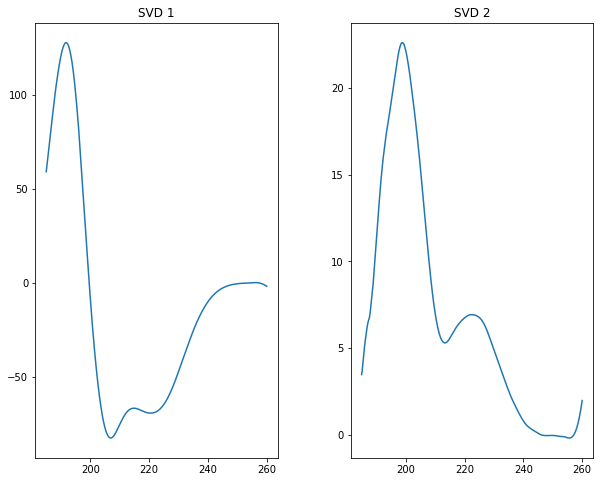

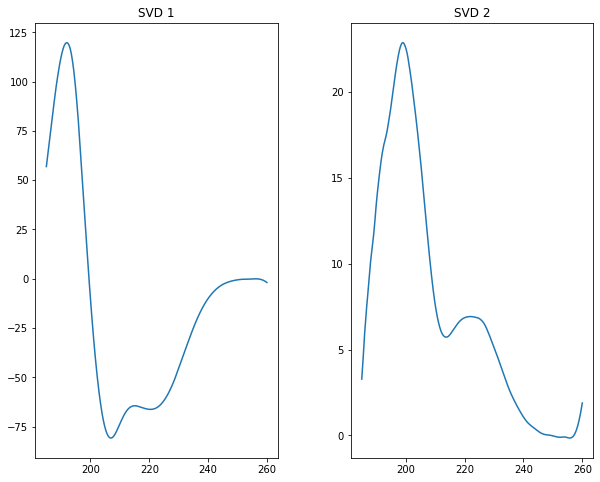

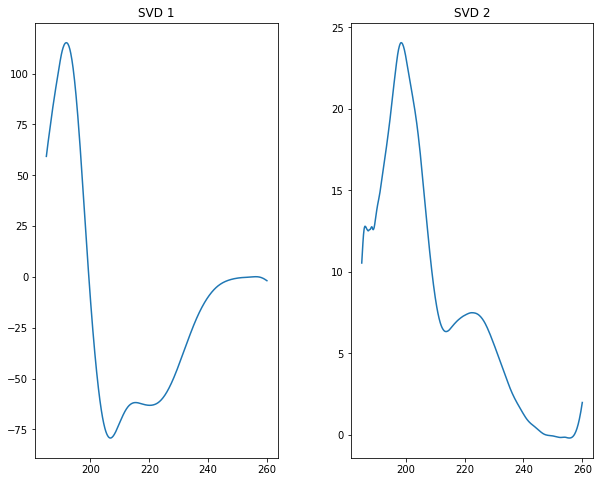

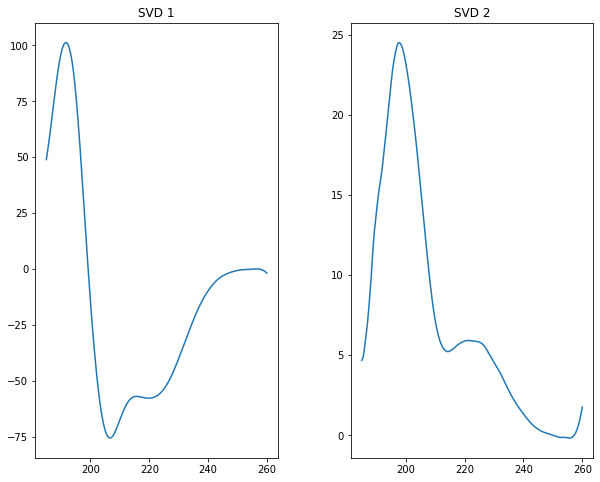

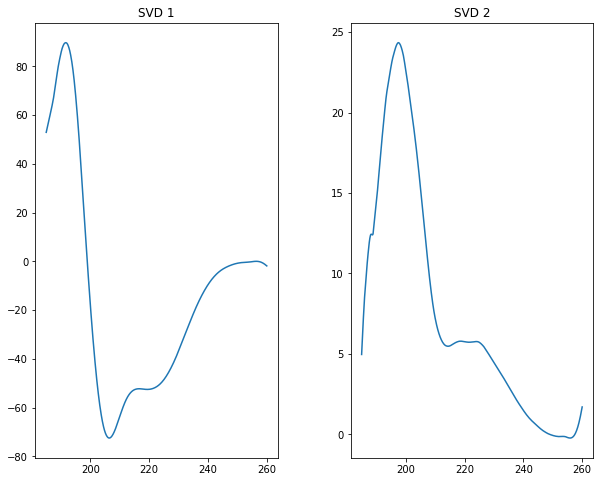

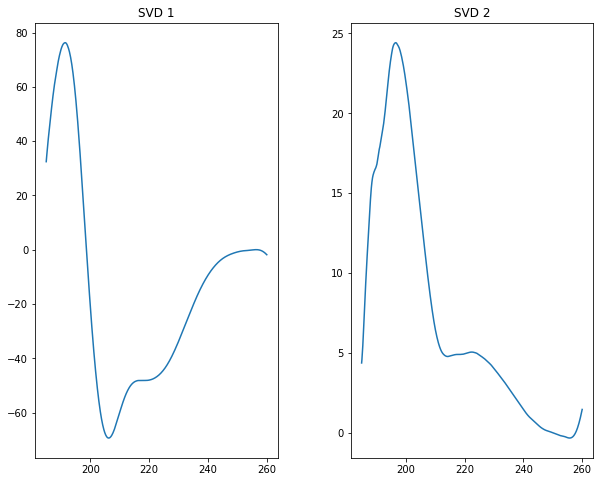

In [ ]:
XY1=epec(2,X1_a,s1,lam1)#5C 
XY2=epec(2,X2_a,s2,lam2)#10C 
XY3=epec(2,X3_a,s3,lam3)#15C 
XY4=epec(2,X4_a,s4,lam4)#20C 
XY5=epec(2,X5_a,s5,lam5)#25C 
XY6=epec(2,X6_a,s6,lam6)#35C 
XY7=epec(2,X7_a,s7,lam7)#45C 
XY8=epec(2,X8_a,s8,lam8)#35C 











# Calculating f from SVD1 & SVD2 

We can condider a given spectrum S and two SVD components by  :

\begin{align}
Sobs_{\lambda}= \cup(y_{\lambda})\\
SVD1=\cup(y1_{\lambda})\\
SVD2=\cup(y2_{\lambda})\\
Scal_{\lambda}= f.y1_{\lambda} + (1-f)y2_{\lambda}\\
\end{align}
Now the minmization can be written as:
\begin{equation}
\frac{\delta \phi}{\delta f}=0 
\end{equation}
As,
\begin{equation}
\phi = \sum_{\lambda}(Sobs_{\lambda}-Scal_{\lambda})^2\\
\end{equation}

\begin{align}
\frac{\delta \phi}{\delta f}=0, implies\\
f = \frac{\sum_{\lambda}(y_{\lambda}-y2_{\lambda})\Delta y_{\lambda}}{\sum_{\lambda}\Delta y_{\lambda}^2} \\ 
\end{align}

Here, $\Delta y_{\lambda}=y1_{\lambda}-y2_{\lambda}$


In [ ]:
# function to evaluate f from SVD components 

def svd2f(X,XY):
  # Two SVD components
  y1=XY[:,0]
  y2=XY[:,1]
  dy=y1-y2
  r,c=X.shape
  f=[]
  for i in range(c):
    N=np.dot(X[:,i]-y2,y1-y2)
    D=np.dot(dy,dy)
    f.append(np.sum(N)/np.sum(D))
  return f


In [ ]:
F1=svd2f(X1,XY1)
F2=svd2f(X2,XY2)
F3=svd2f(X3,XY3)
F4=svd2f(X4,XY4)
F5=svd2f(X5,XY5)
F6=svd2f(X6,XY6)
F7=svd2f(X7,XY7)
F8=svd2f(X8,XY8)


#plt.plot(tfe,np.log(F1),'-o',label='5C')


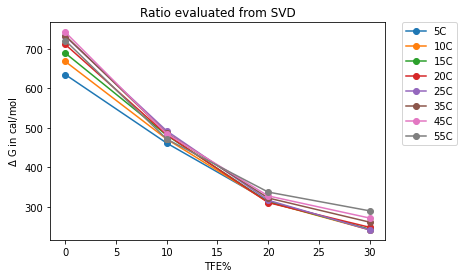

In [ ]:
plt.plot(tfe,-2*(273+5)*np.log(F1),'-o',label='5C')
plt.plot(tfe,-2*(273+10)*np.log(F2),'-o',label='10C')
plt.plot(tfe,-2*(273+15)*np.log(F3),'-o',label='15C')
plt.plot(tfe,-2*(273+20)*np.log(F4),'-o',label='20C')
plt.plot(tfe,-2*(273+25)*np.log(F5),'-o',label='25C')
plt.plot(tfe,-2*(273+35)*np.log(F6),'-o',label='35C')
plt.plot(tfe,-2*(273+45)*np.log(F7),'-o',label='45C')
plt.plot(tfe,-2*(273+55)*np.log(F8),'-o',label='55C')
plt.xlabel('TFE%')
plt.ylabel('$\Delta$ G in cal/mol')
plt.title('Ratio evaluated from SVD')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()



In [ ]:

t_C_f = {'TFE%':tfe,'5C':F1,'10C':F2,'15C':F3,'20C':F4,'25C':F5,'35C':F6,'45C':F7,'55C':F8}
tcf=pd.DataFrame.from_dict(t_C_f)
print("Table 3: SVD 1 fractions as a function of TFE % for different temperatures")
tcf

Table 3: SVD 1 fractions as a function of TFE % for different temperatures


,TFE%,5C,10C,15C,20C,25C,35C,45C,55C
0,0,0.319034,0.306988,0.301998,0.296918,0.292719,0.303750,0.311116,0.332868
1,10,0.436221,0.434718,0.433654,0.438964,0.437898,0.453839,0.466359,0.487352
2,20,0.568142,0.576254,0.581500,0.588857,0.588156,0.592828,0.597731,0.598201
3,30,0.647363,0.653074,0.656100,0.655289,0.667324,0.654859,0.652839,0.643180


# Inference 
- TFE serves a helix stabilizer 
- At 15% TFE , the free energy of  SVD2 to SVD1  transition (fraction = [SVD1]/[SVD2]) is independent of T (iso-hydrophobic point?) 